In [1]:
import pathlib
import json
import matplotlib.pyplot as plt
import tabulate
from IPython.display import HTML, display

In [2]:
%matplotlib inline

# run `make generate-data` if the file is missing
data = json.loads(pathlib.Path("data.json").read_text())

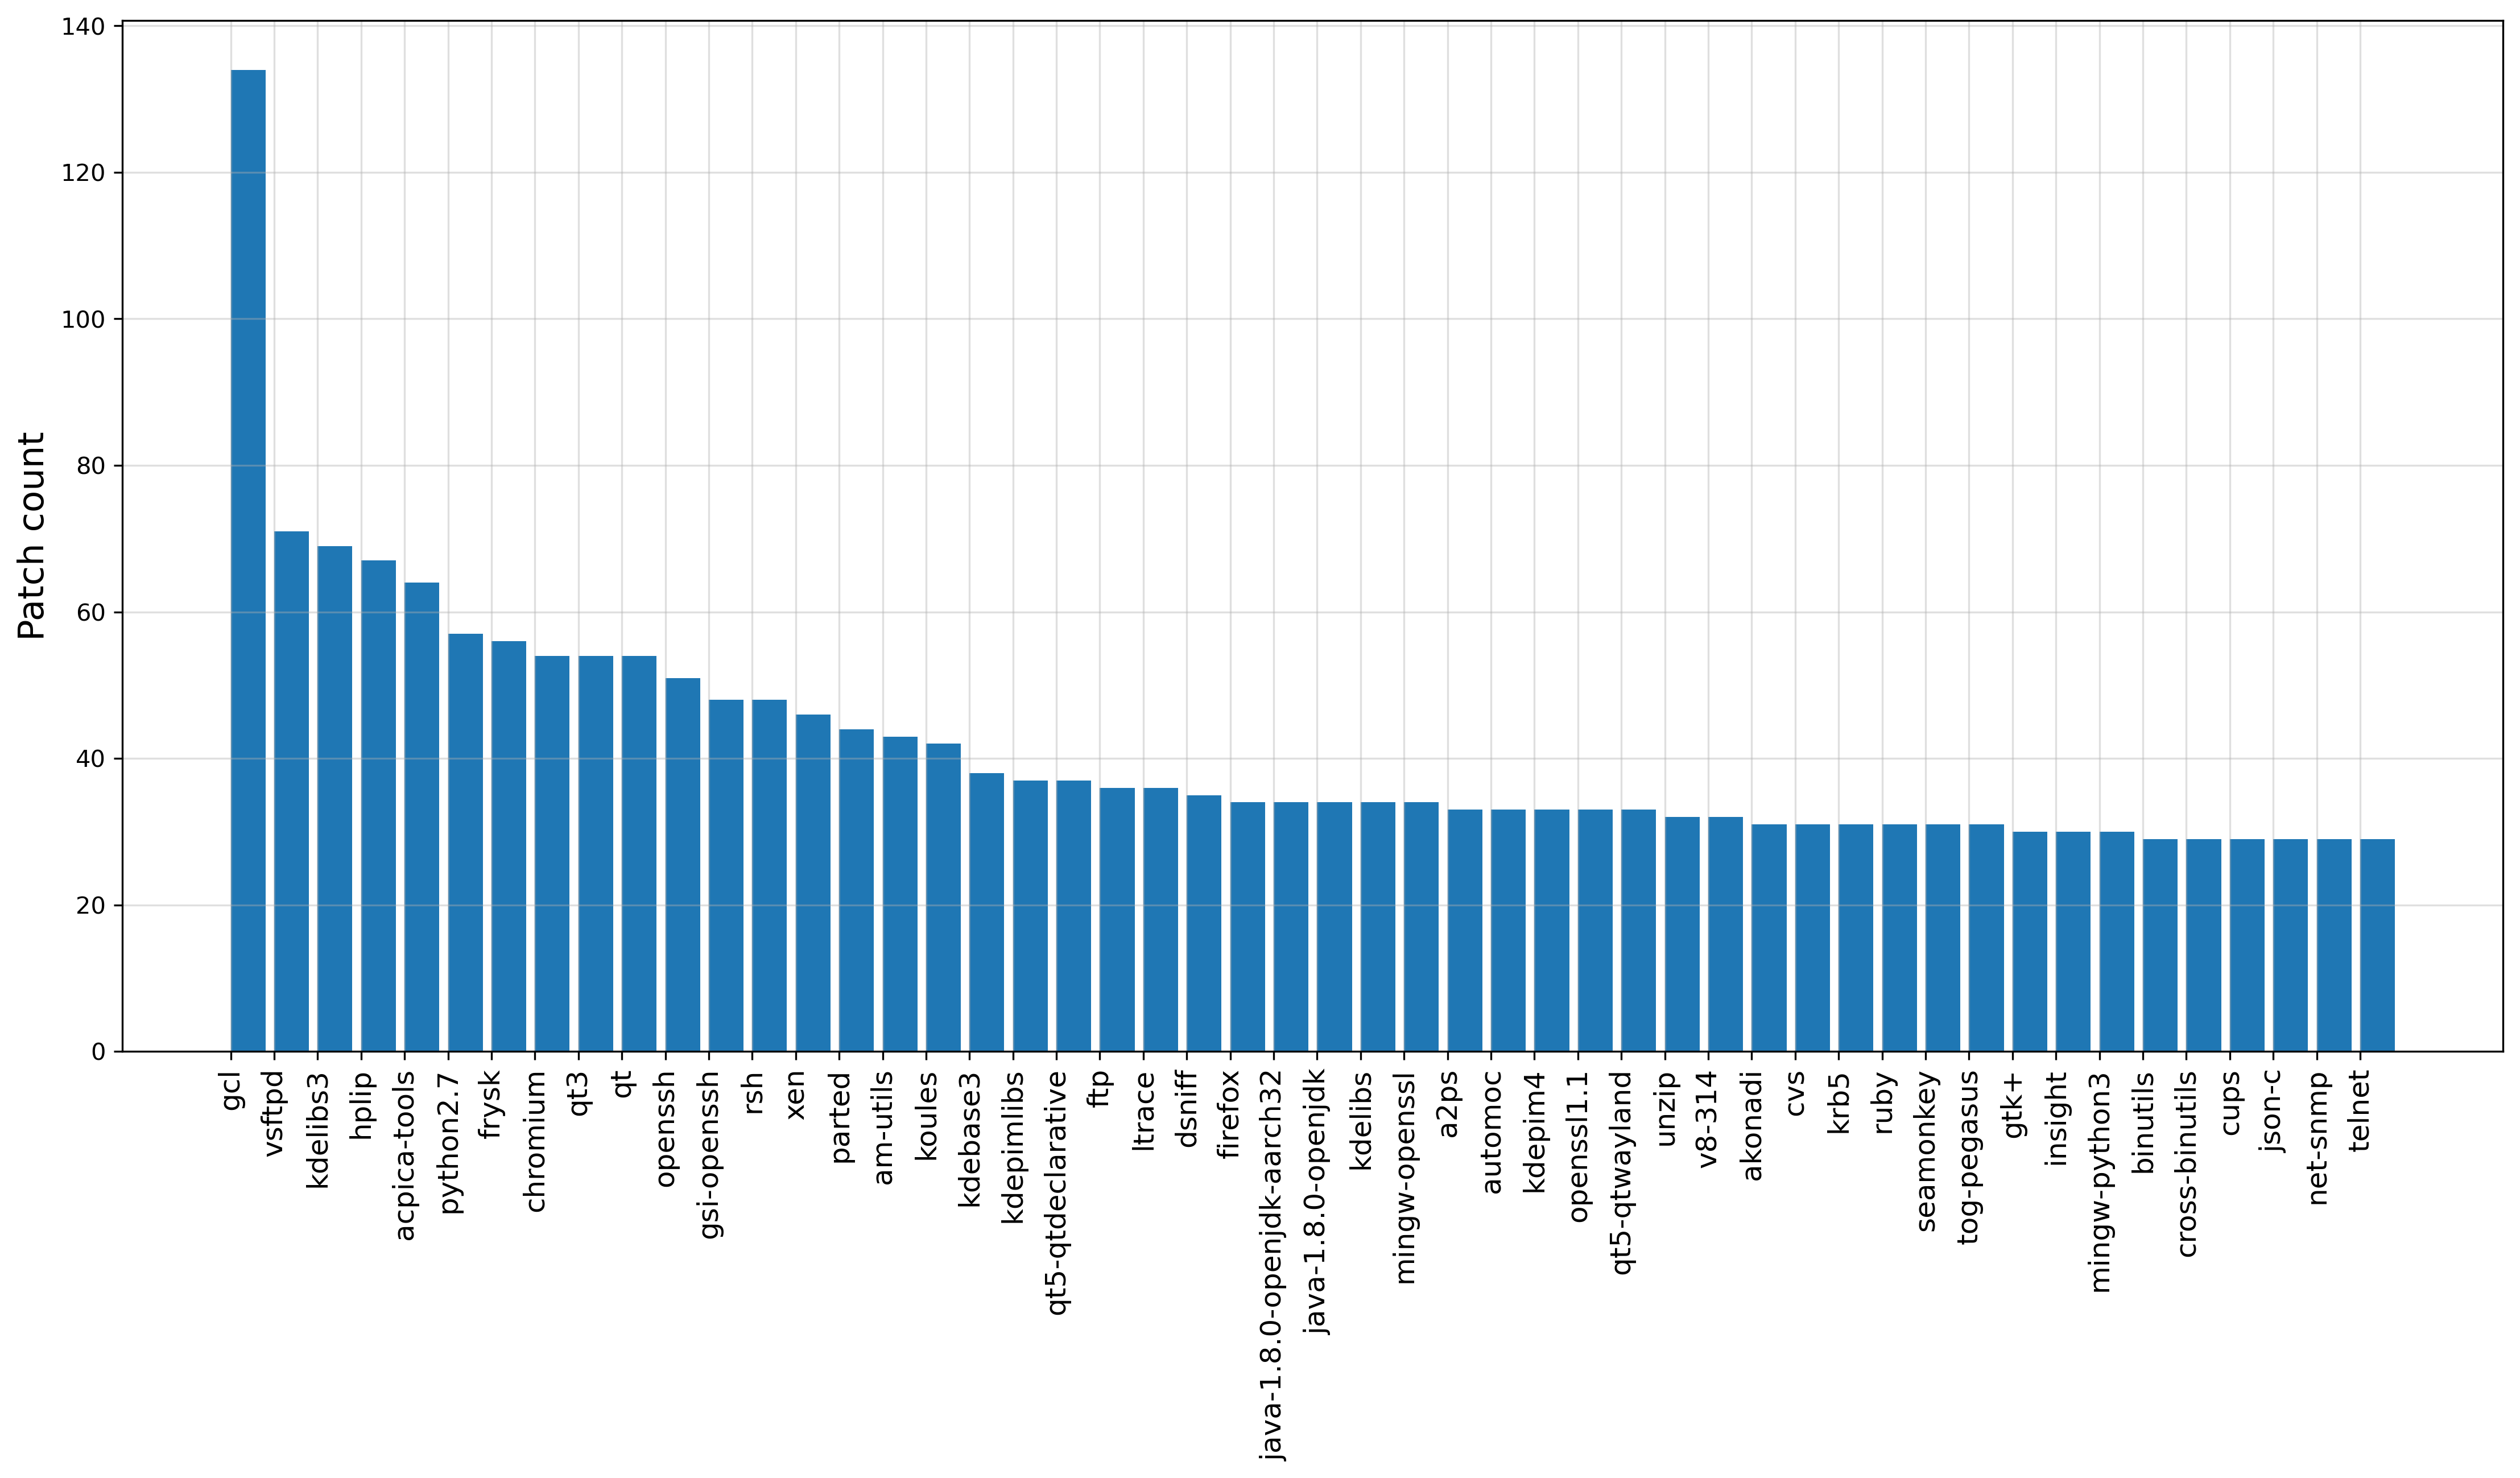

In [3]:
def plot_patch_count():
    fig = plt.figure(figsize=(18,8), dpi=300)
    ax = plt.axes()
    plt.grid(visible=True, alpha=0.4)    
    plt.ylabel('Patch count', fontsize=15)
    
    packages = [x[0] for x in data]
    num_patches = [y[1] for y in data]
    
    ax.bar(packages, num_patches, align='edge', width=0.8)

    plt.setp(ax.get_xticklabels(), fontsize=12, rotation=90)
    plt.show()
    
plot_patch_count()

In [4]:
visualized_data = []
for item in data:
    visualized_data.append(
        [f"<a href=\"https://src.fedoraproject.org/rpms/{item[0]}/blob/rawhide/f/{item[0]}.spec\">{item[0]}</a>", ] +
        item[1:]
    )
# unsafehtml = so we can add hyperlinks
display(HTML(
tabulate.tabulate(
    visualized_data,
    tablefmt='unsafehtml',
    headers=["Package", "# of patches", "uses %autosetup", "uses %setup", "uses %patch", "uses %autopatch", "builds in f34"])
))

Package,# of patches,uses %autosetup,uses %setup,uses %patch,uses %autopatch,builds in f34
gcl,134,True,False,False,False,3
vsftpd,71,True,False,False,False,3
kdelibs3,69,False,True,True,False,3
hplip,67,False,True,True,False,4
acpica-tools,64,False,True,False,True,3
python2.7,57,False,True,True,False,3
frysk,56,False,True,True,False,3
chromium,54,False,True,True,False,6
qt3,54,False,True,True,False,3
qt,54,False,True,True,False,3
